# Import Data for Q_5

In [ ]:
!pip install pandas openpyxl


In [112]:
import pandas as pd
import numpy as np 
import matplotlib as plt 
import seaborn as sns 


In [27]:
# Load the data
sumR1401 = pd.read_excel('SumR1401.xlsx', header=0)
sumU1401 = pd.read_excel('SumU1401.xlsx', header=0)


# Question 5

In [61]:


sumU1401['B24'] = sumU1401['B24'].astype(str)


sum1401 = pd.concat([sumR1401, sumU1401])


sum1401['ADDRESS'] = sum1401['ADDRESS'].astype(str)


sum1401['ur'] = sum1401['ADDRESS'].str[0]
sum1401['province'] = sum1401['ADDRESS'].str[1:3]


sum1401['province'] = pd.to_numeric(sum1401['province'], errors='coerce')


province_mapping = {
    0: "Markazi", 1: "Gilan", 2: "Mazandaran", 3: "Azarbaijan Sharghi", 4: "Azarbaijan Gharbi",
    5: "Kermanshah", 6: "Khouzestan", 7: "Fars", 8: "Kerman", 9: "Khorasan razavi", 10: "Esfahan",
    11: "Sistan Balouhestan", 12: "Kordestan", 13: "Hamedan", 14: "Chaharmahal bakhtiari", 15: "Lorestan",
    16: "Ilam", 17: "Kohgiloye boyerahmad", 18: "Bushehr", 19: "Zanjan", 20: "Semnan", 21: "Yazd",
    22: "Hormozgan", 23: "Tehran", 24: "Ardebil", 25: "Ghom", 26: "Ghazvin", 27: "Golestan",
    28: "Khorasan Shomali", 29: "Khorasan jonoubi", 30: "Alborz"
}


sum1401['province_name'] = sum1401['province'].map(province_mapping)


ur_mapping = {'1': 'urban', '2': 'rural'}
sum1401['ur_string'] = sum1401['ur'].map(ur_mapping)


sum1401['no_literacy'] = (sum1401['A05'] == 0).astype(int)
sum1401['literate_no_edu'] = (sum1401['A05'] == 9).astype(int)
sum1401['primary'] = (sum1401['A05'] == 1).astype(int)
sum1401['middle'] = (sum1401['A05'] == 2).astype(int)
sum1401['high'] = (sum1401['A05'] == 3).astype(int)
sum1401['diploma'] = ((sum1401['A05'] == 4) | (sum1401['A05'] == 5)).astype(int)
sum1401['bachelor'] = (sum1401['A05'] == 6).astype(int)
sum1401['master_and_higher'] = ((sum1401['A05'] == 7) | (sum1401['A05'] == 8)).astype(int)


sum1401.rename(columns={'Daramad': 'Income', 'C01': 'Family_Size'}, inplace=True)


summary_province = sum1401.groupby('province_name').agg(
    mean_income=('Income', 'mean'),
    sd_income=('Income', 'std'),
    max_income=('Income', 'max'),
    min_income=('Income', 'min'),
    mean_family_size=('Family_Size', 'mean'),
    sd_family_size=('Family_Size', 'std'),
    max_family_size=('Family_Size', 'max'),
    min_family_size=('Family_Size', 'min'),
    mean_no_literacy=('no_literacy', 'mean'),
    mean_literate_no_edu=('literate_no_edu', 'mean'),
    mean_primary=('primary', 'mean'),
    mean_middle=('middle', 'mean'),
    mean_high=('high', 'mean'),
    mean_diploma=('diploma', 'mean'),
    mean_bachelor=('bachelor', 'mean'),
    mean_master_and_higher=('master_and_higher', 'mean')
)

summary_ur = sum1401.groupby('ur_string').agg(
    mean_income=('Income', 'mean'),
    sd_income=('Income', 'std'),
    max_income=('Income', 'max'),
    min_income=('Income', 'min'),
    mean_family_size=('Family_Size', 'mean'),
    sd_family_size=('Family_Size', 'std'),
    max_family_size=('Family_Size', 'max'),
    min_family_size=('Family_Size', 'min'),
    mean_no_literacy=('no_literacy', 'mean'),
    mean_literate_no_edu=('literate_no_edu', 'mean'),
    mean_primary=('primary', 'mean'),
    mean_middle=('middle', 'mean'),
    mean_high=('high', 'mean'),
    mean_diploma=('diploma', 'mean'),
    mean_bachelor=('bachelor', 'mean'),
    mean_master_and_higher=('master_and_higher', 'mean')
)


print("Summary by Province:")
print(summary_province)

print("\nSummary by Urban/Rural:")
summary_ur


Summary by Province:
                        mean_income     sd_income   max_income   min_income  \
province_name                                                                 
Alborz                 1.742204e+09  9.008506e+08   9131075000    185200000   
Ardebil                1.043295e+09  1.637561e+09  41446928000    -67771224   
Azarbaijan Gharbi      1.277094e+09  9.483691e+08  11612928776     67247000   
Azarbaijan Sharghi     1.229459e+09  1.061759e+09  18200000000     53960000   
Bushehr                1.345898e+09  8.592292e+08  10636000000     78850380   
Chaharmahal bakhtiari  1.394109e+09  8.634936e+08   7232611229     79597536   
Esfahan                1.472045e+09  9.950363e+08  14338380000    126274388   
Fars                   1.304048e+09  1.285549e+09  34624000000     76664388   
Ghazvin                1.277769e+09  7.993043e+08   6300000000    139155000   
Ghom                   1.126783e+09  6.011707e+08   5354379000    142840000   
Gilan                  1.228747

,mean_income,sd_income,max_income,min_income,mean_family_size,sd_family_size,max_family_size,min_family_size,mean_no_literacy,mean_literate_no_edu,mean_primary,mean_middle,mean_high,mean_diploma,mean_bachelor,mean_master_and_higher
ur_string,,,,,,,,,,,,,,,,
rural,9.700013e+08,8.511601e+08,36866100000,-26250920000,3.358518,1.526284,16,1,0.302654,0.006147,0.346715,0.163784,0.014850,0.133105,0.027578,0.005168
urban,1.410527e+09,1.108023e+09,41446928000,-283322857,3.308376,1.359022,13,1,0.160832,0.004140,0.244238,0.166300,0.013134,0.262125,0.106353,0.042878


# Question 6

In [57]:
sum1401 = pd.concat([sumR1401, sumU1401])

sum1401['exp'] = sum1401['VKhorak'] + sum1401['VGheirehKhorak']

sum1401['exp_Q'] = pd.qcut(sum1401['exp'], q=10, labels=False, precision=0)

sum1401.to_excel('Qusetion_6_expenditure_deciles.xlsx', index=False)

print("Expenditure deciles calculated and saved as 'Question_6_expenditure_deciles.xlsx'.")

Expenditure deciles calculated and saved as 'q6_expenditure_deciles.xlsx'.


# Question 7

In [74]:
U1401P3S13 = pd.read_stata('U1401P3S13.dta')
R1401P3S13 = pd.read_stata('R1401P3S13.dta')

data1401 = pd.concat([R1401P3S13, U1401P3S13])
Q_6 = pd.read_excel('Q_6_expenditure_deciles.xlsx', header=0)


In [94]:
print("\nColumn names in Q_6:")
print(Q_6.columns)


Column names in Q_6:
Index(['ADDRESS', 'C01', 'C02', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07',
       'C03',
       ...
       'K06', 'K07', 'K08', 'K09', 'K10', 'K11', 'K12', 'K13', 'exp', 'exp_q'],
      dtype='object', length=138)


In [96]:
print("Column names in data1401:")
print(data1401.columns)

Column names in data1401:
Index(['Address', 'DYCOL01', 'DYCOL02', 'DYCOL03', 'DYCOL04', 'DYCOL05',
       'DYCOL06'],
      dtype='object')


In [98]:
print("First few rows in Q_6:")
print(Q_6[['A02', 'A03', 'exp']].head())

print("\nFirst few rows in data1401:")
print(data1401[['DYCOL01', 'DYCOL02']].head())


First few rows in Q_6:
   A02  A03           exp
0   38    1  1.097260e+09
1   83    2  3.760000e+08
2   48    1  3.065112e+08
3   41    1  4.504476e+08
4   61    1  5.094176e+08

First few rows in data1401:
  DYCOL01      DYCOL02
0  063144             
1  063144             
2  125317  2          
3  139113             
4  139116             


In [90]:
data1401['Address'] = data1401['Address'].astype(str)
Q_6['ADDRESS'] = Q_6['ADDRESS'].astype(str)

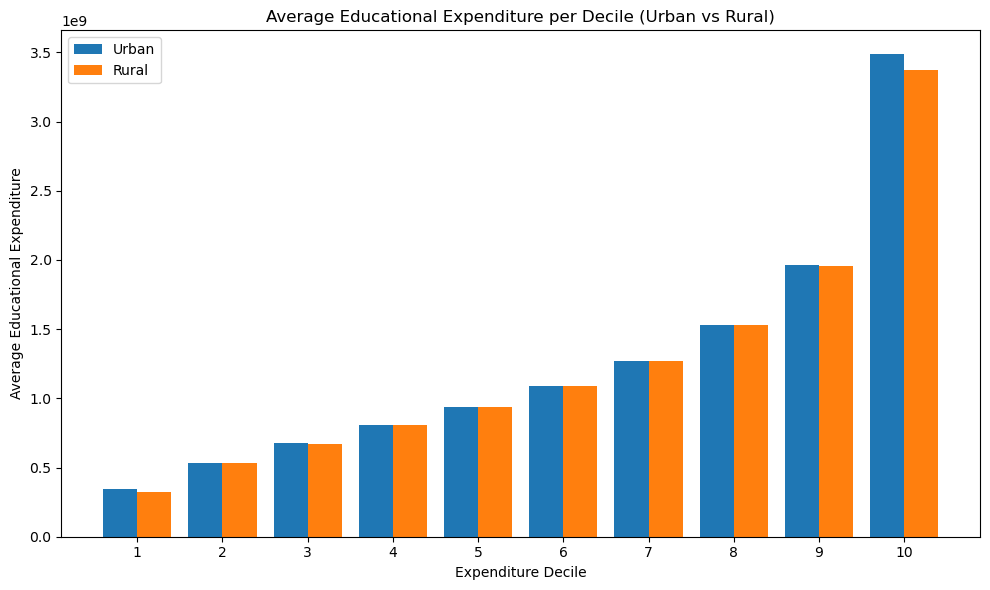

In [120]:
merged_data = pd.merge(data1401, Q_6, left_on='Address', right_on='ADDRESS', how='inner')

merged_data['edu_exp'] = merged_data['exp']

merged_data['ur'] = merged_data['Address'].str[0].apply(lambda x: 1 if x == '1' else 0)

merged_data['exp_decile'] = pd.qcut(merged_data['edu_exp'], 10, labels=False)

avg_edu_exp = merged_data.groupby(['exp_decile', 'ur'])['edu_exp'].mean().reset_index()

plt.figure(figsize=(10, 6))

urban_data = avg_edu_exp[avg_edu_exp['ur'] == 1]
rural_data = avg_edu_exp[avg_edu_exp['ur'] == 0]

plt.bar(urban_data['exp_decile'] - 0.2, urban_data['edu_exp'], width=0.4, label='Urban', align='center')
plt.bar(rural_data['exp_decile'] + 0.2, rural_data['edu_exp'], width=0.4, label='Rural', align='center')

plt.xlabel('Expenditure Decile')
plt.ylabel('Average Educational Expenditure')
plt.title('Average Educational Expenditure per Decile (Urban vs Rural)')
plt.xticks(range(10), [str(i+1) for i in range(10)])
plt.legend()

plt.tight_layout()
plt.show()

# Q_8

In [122]:

collapsed_data.to_excel('average_education_expenditure_by_decile.xlsx', index=False)


In [124]:
R1401P1 = pd.read_stata('R1401P1.dta')
U1401P1 = pd.read_stata('U1401P1.dta')

Data1401P1 = pd.concat([R1401P1, U1401P1])

In [150]:
Data1401P1['Address'] = Data1401P1['Address'].astype(str)  
Q_6['ADDRESS'] = Q_6['ADDRESS'].astype(str)  

merged_data = pd.merge(Data1401P1, Q_6, left_on='Address', right_on='ADDRESS', how='inner')

print(merged_data.head())


       Address DYCOL01 DYCOL03 DYCOL04 DYCOL05 DYCOL06 DYCOL07 DYCOL08  \
0  21702576225      02       2       2      37       2                   
1  21702576225      03       3       2      13       1       2      1    
2  21702576225      04       3       1      08       1       1      1    
3  21702576225      05       3       1      03                           
4  21702576229      01       1       1      45       1       2      2    

  DYCOL09 DYCOL10  ...         K06         K07         K08        K09  \
0       1       1  ...  42600000.0   6000000.0   7200000.0   450000.0   
1       5       4  ...  42600000.0   6000000.0   7200000.0   450000.0   
2                  ...  42600000.0   6000000.0   7200000.0   450000.0   
3                  ...  42600000.0   6000000.0   7200000.0   450000.0   
4       1       1  ...         NaN  19910000.0  65600000.0  1770000.0   

        K10        K11        K12         K13          exp  exp_q  
0       NaN  1080000.0  8811940.0   1200000.0  5

In [146]:
print("Columns in merged_data:")
print(merged_data.columns)

print("\nColumns in Q_7:")
print(Q_7.columns)


Columns in merged_data:
Index(['Address', 'DYCOL01', 'DYCOL03', 'DYCOL04', 'DYCOL05', 'DYCOL06',
       'DYCOL07', 'DYCOL08', 'DYCOL09', 'DYCOL10',
       ...
       'K06', 'K07', 'K08', 'K09', 'K10', 'K11', 'K12', 'K13', 'exp', 'exp_q'],
      dtype='object', length=148)

Columns in Q_7:
Index(['exp_q', 'avg_edu_exp_u', 'avg_edu_exp_r'], dtype='object')
